<a href="https://colab.research.google.com/github/shamreen20/Learn-Deep-Learning/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This ANN project is about wheater a customer is continuing with bank or exit.
Dependent column is existed and all other columns are independent.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/My Drive/datasets_13831_18644_Churn_Modelling.csv") 

#Exploring Data

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


in info section we see there are some object column, so we have to change it info interger for ML so that ML works on it.

In [8]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Use dummies for object-type column and also use "drop_first=Ture" for avoiding "dummy variable trap"

In [9]:
Geography_d = pd.get_dummies(df.Geography, drop_first=True)
Geography_d

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
Gender_d = pd.get_dummies(df.Gender,drop_first=True)
Gender_d

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
X = pd.concat([X,Geography_d,Gender_d],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
X = X.drop(["Geography","Gender"], axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


# Splitting the data into training set or test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Feature scaling
In which we scaling the inputs, it is helping to execute the mathematical steps between input and hidden layer in deep learning.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#importing the Keras Libraries and packages for performing ANN

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Dropout is a regularization parameter, we using it whenever the neural network is dense

In [22]:
from keras.layers import Dropout

In [23]:
classifier = Sequential()

adding first hidden layer

In [24]:
classifier.add(Dense(units=6,kernel_initializer="he_uniform", activation="relu",input_dim = 11))

adding second hidden layer

In [25]:
classifier.add(Dense(units=6,kernel_initializer="he_uniform", activation="relu"))

adding output layer 

In [26]:
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform", activation="sigmoid"))

Compiling the ANN

In [27]:
classifier.compile(optimizer="Adamax", loss="binary_crossentropy", metrics = ['accuracy'])

Fitting the ANN to the training set

In [29]:
model_history = classifier.fit(X_train, y_train, validation_split=0.2,batch_size=10, epochs=100)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 4s 663us/step - loss: 0.5694 - accuracy: 0.7483 - val_loss: 0.4858 - val_accuracy: 0.8087
Epoch 2/100
6400/6400 [==============================] - 3s 391us/step - loss: 0.4670 - accuracy: 0.8061 - val_loss: 0.4644 - val_accuracy: 0.8069
Epoch 3/100
6400/6400 [==============================] - 3s 392us/step - loss: 0.4496 - accuracy: 0.8119 - val_loss: 0.4522 - val_accuracy: 0.8119
Epoch 4/100
6400/6400 [==============================] - 2s 388us/step - loss: 0.4394 - accuracy: 0.8166 - val_loss: 0.4439 - val_accuracy: 0.8125
Epoch 5/100
6400/6400 [==============================] - 2s 389us/step - loss: 0.4331 - accuracy: 0.8181 - val_loss: 0.4382 - val_accuracy: 0.8125
Epoch 6/100
6400/6400 [==============================] - 3s 399us/step - loss: 0.4281 - accuracy: 0.8200 - val_loss: 0.4336 - val_accuracy: 0.8144
Epoch 7/100
6400/6400 [==============================] - 3s 392us/step

list all data in history

In [30]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


# summarize history for accuracy

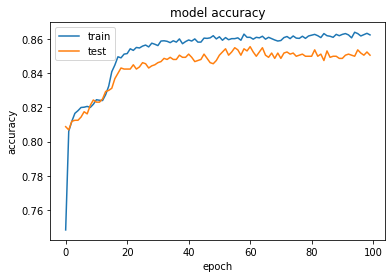

In [32]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss

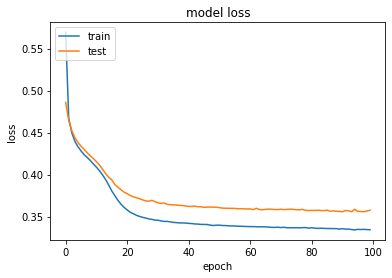

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Making the predictions and evaluating the model
Predicting the Test set results

In [34]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1495,  100],
       [ 186,  219]])

In [37]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.857